# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset chosen is the "No-show appointments" dataset. It includes data and information about various medical appointments in Brazil, with an aim to identify if patients attend or show up for their medical appointments or not. Using this dataset, an exploration will be carried out to try to understand what are the factors that can contribute to patients missing their appointments. This can be further explored by taking a deeper look into different angles and features that are present in this dataset:

**PatientId**: An identification for each patient.

**AppointmentID**: Identification for the appointments.

**Gender**: Male or Female.

**ScheduledDay**: The day the patient booked the appointment.

**AppointmentDay**: The day of the appointment.

**Age**: Identifying how old is the patient.

**Neighbourhood**: The location of the appointment.

**Scholarship**: Identifies if the patient is enrolled in Brazilian welfare program.

**Hipertension**: If the patient is hipertension, True or False.

**Diabetes**: If the patient suffers from diabetes, True or False.

**Alcholism**: True or False.

**Handcap**: True or False.

**SMS_recieved**: If a message is sent to the patient or not.

**No-show**: If the patient showed up for the appointment or not. **(No=show up, Yes=not show up)**.
### Question(s) for Analysis

**1**. Where do patients that do not show up for the appointment mostly come from?


**2**. How old are the patients that miss the appointment?


**3**. What is the number of handicapped patients, compared with patients that are not handicapped that do not show up for the appointments?


**4**. What is the number of patients that did not recieve SMS message and did not show up? How do they compare with the patients that recieved SMS message and did not show up?



**5**. What is the number of patients that need financial support and did not show up?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('/home/workspace/Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Checking the data types in the data set**

In [5]:
#To check data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

After checking the data types, it is found that:

-The ScheduledDay and AppointmentDay should be of datetime.

-The columns: Scholarship, Hipertension, Diabetes, Alcoholism, Handcap and SMS_received should be of type bool instead of int.

**Checking the dataset for any null data**

In [6]:
#To check for null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


This dataset has no null data

**Checking the data for duplicate rows**

In [7]:
#To check for duplicates
sum(df.duplicated())

0

The dataset has no duplicate rows

### Data Cleaning

**Changing data types**

Changes to be made as inferred from above:

1. ScheduledDay and AppointmentDay from object to datetime.

2. Scholarship, Hipertension, Diabetes, Alcoholism, Handcap and SMS_received from int to bool

**1. ScheduledDay and AppointmentDay from object to datetime**

In [8]:
#Changing the columns ScheduledDay and AppointmentDay from object to datetime
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

To confirm that the ScheduledDay and AppointmentDay are changed from object to datetime

In [9]:
#Checking that the columns are changed correctly
df['ScheduledDay'].dtypes, df['AppointmentDay'].dtypes

(datetime64[ns, UTC], datetime64[ns, UTC])

**2. Scholarship, Hipertension, Diabetes, Alcoholism, Handcap and SMS_received from int to bool**

In [10]:
#A loop over the columns to change the datatype 
col=['Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']
for x in col:
    df[x]=df[x].astype(bool)

To confirm that Scholarship, Hipertension, Diabetes, Alcoholism, Handcap and SMS_received are changed from int to bool

In [11]:
df[col].dtypes

Scholarship     bool
Hipertension    bool
Diabetes        bool
Alcoholism      bool
Handcap         bool
SMS_received    bool
dtype: object

**Function to output a chart**

In [12]:
def chart_visual (x1_value,x2_value,x1_label,x2_label):
    """This function helps to create a bar chart
        x1_value=first value on x axis
        x2_value=second value on x axis
        x1_label=first label on x axis corresponding to x1_value
        x2_label=second label on x axis corresponding to x2_value"""
    return plt.bar([1,2],[x1_value,x2_value],tick_label=[x1_label,x2_label])
    

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Where do patients that do not show up for the appointment mostly come from?)

To answer this question, only the fields where the patients did not show up will be selected

In [13]:
#A dataframe that contains only the data of the patients that did not show up for the appointment
no_show_patients=df[df['No-show']=='Yes']
no_show_patients.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,False,False,False,False,False,False,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,False,False,False,False,False,False,Yes
11,7.542951e+12,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,False,False,False,False,False,True,Yes
17,1.479497e+13,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,True,False,False,False,False,False,Yes
20,6.222575e+14,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,False,False,False,False,False,False,Yes


In [14]:
#Using .describe() to view statistical data about different features in the dataset
no_show_patients.describe()

,PatientId,AppointmentID,Age
count,2.231900e+04,2.231900e+04,22319.000000
mean,1.467523e+14,5.652259e+06,34.317667
std,2.549905e+14,7.429686e+04,21.965941
min,5.628261e+06,5.122866e+06,0.000000
25%,4.176779e+12,5.614192e+06,16.000000
50%,3.156794e+13,5.657916e+06,33.000000
75%,9.454270e+13,5.703175e+06,51.000000
max,9.996585e+14,5.789986e+06,115.000000


**Single variable exploration**

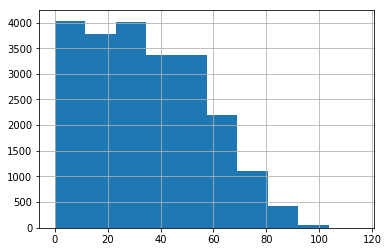

In [15]:
#Viewing a histogram of the Age column to understand what are the ages that do not show up for the appointments
no_show_patients['Age'].hist();

Since the not_show_patients dataframe contains only the data of the patients that did not show up, we will show immediately the count of each neighbourhood for the patients that did not show up

In [16]:
#The count of the patients that come from different neighbourhoods and miss the appointment
location=no_show_patients['Neighbourhood'].value_counts()
location

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHA DO FRADE                     2
ILHAS OCEÂNICAS DE TRINDADE       2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64

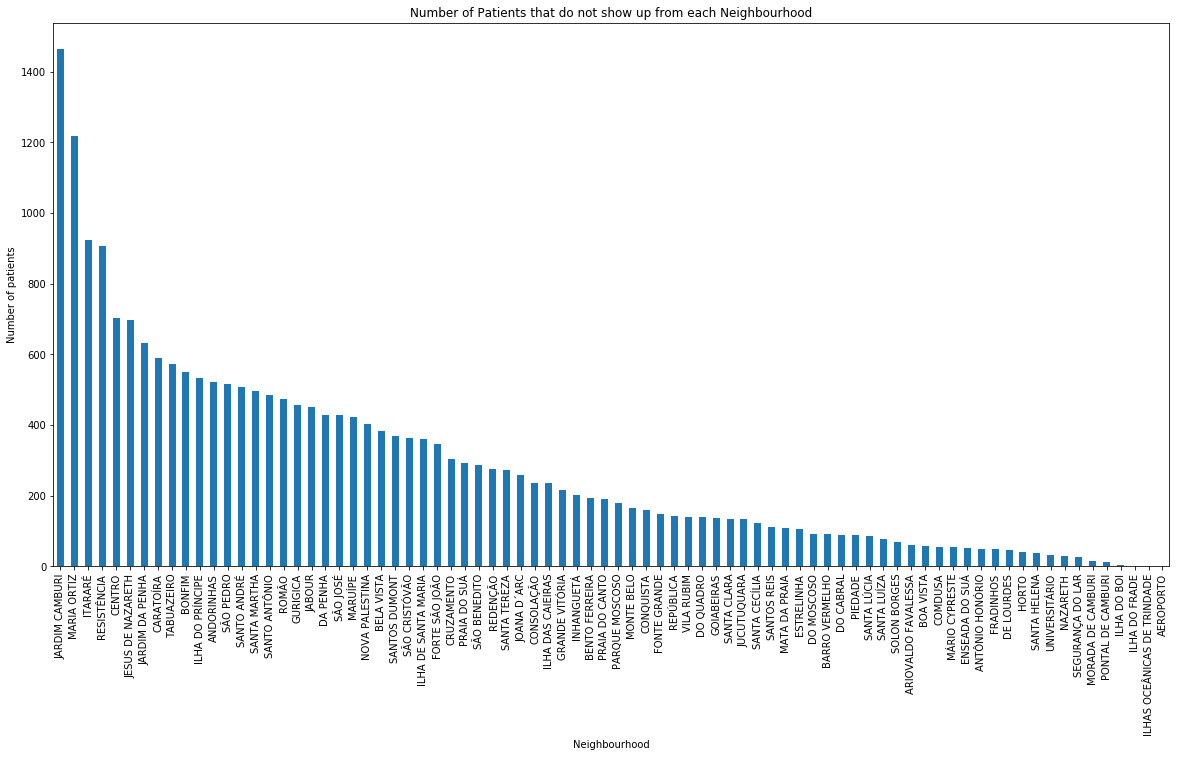

In [17]:
#Creating a bar chart to better understand what is the most common neighbourhood that patients come from 
#and miss the appointments.
ind=no_show_patients['Neighbourhood'].value_counts().index
visual=no_show_patients['Neighbourhood'].value_counts()[ind].plot(kind='bar',figsize=(20,10),
                                              title='Number of Patients that do not show up from each Neighbourhood')
visual.set_xlabel('Neighbourhood')
visual.set_ylabel('Number of patients');

**This shows that Jardim Camburi neighbourhood has the highest number of patients that do not show up for medical appointments**

### Research Question 2  (How old are the patients that miss the appointment?)

**For this question, age will be split into 4 groups for patients that did not show up: Children (0-14), Young(15-24), Adults(25-64), Old(65+)** 

Filter the dataframe to include only the patients that did not show up

In [18]:
#A dataset that contains only the patients that do not show up
no_show_patients=df[df['No-show']=='Yes']

Split the ages into age groups

In [19]:
#Splitting age group to children category
children=no_show_patients.query('Age<=14')
children_group=children['Age'].value_counts().sum()
children_group

4926

This value indicates that there are 4926 patients under the 'children' age group that did not show up for the appointment

In [20]:
#Splitting age group to young category
young=no_show_patients.query('Age>=15 and Age<=24')
young_group=young['Age'].value_counts().sum()
young_group

3540

3540 young patients did not show up for the appointment

In [21]:
#Splitting age group to adults category
adults=no_show_patients.query('Age>=25 and Age<=64')
adults_group=adults['Age'].value_counts().sum()
adults_group

11620

11620 patients in the adult age group did not show up for the appointment

In [22]:
#Splitting age group to old category
old=no_show_patients.query('Age>=65')
old_group=old['Age'].value_counts().sum()
old_group

2233

2233 old patients did not show up for the appointment

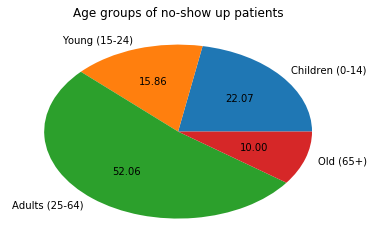

In [23]:
#Creating a pie chart to be able to view the how each age group compare to other age groups where patients do not show up 
#for the appointment
groups=np.array([children_group,young_group,adults_group,old_group])
plt.pie(groups,labels=['Children (0-14)','Young (15-24)','Adults (25-64)','Old (65+)'],autopct='%.2f')
plt.title('Age groups of no-show up patients');

**The pie chart indicates that almost more than 50% of the adults miss their appointments thus, being the highest age group that do not show up for the appointments.**

### Research Question 3 (What is the number of handicapped patients, compared with patients that are not handicapped that do not show up for the appointments?)

A comparison between the number of handicapped and un-handicapped patients who did not show up for the appointments will be made.

In [24]:
#Selecting only the no-show handicapped patients 
handicapped=no_show_patients.query('Handcap==True')
handcap_num=handicapped['Handcap'].value_counts().sum()
handcap_num

407

In [25]:
#Selecting the no-show unhandicapped patients
un_handicapped=no_show_patients.query('Handcap==False')
un_handcap_num=un_handicapped['Handcap'].value_counts().sum()
un_handcap_num

21912

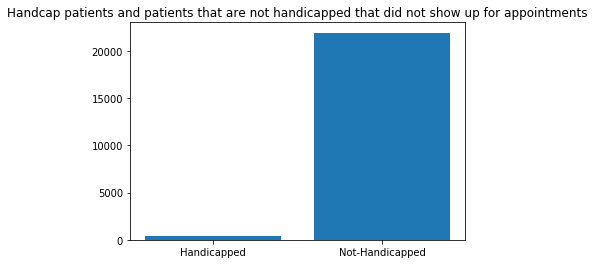

In [26]:
#Creating a bar chart for easier comparison
plt.title('Handcap patients and patients that are not handicapped that did not show up for appointments')
chart_visual(handcap_num,un_handcap_num,'Handicapped','Not-Handicapped');

**It shows that the un-handicapped patients tend to not show up for appointments more than the handicapped patients**

### Research Question 4 (What is the number of patients that did not recieve SMS message and did not show up? How do they compare with the patients that recieved SMS message and did not show up?)

In [27]:
#Selecting no-show patients that recieved SMS message
received=no_show_patients.query('SMS_received==True')
sms=received['SMS_received'].value_counts().sum()
sms

9784

9784 patients recieved SMS message and did not show up for the appointment

In [28]:
#Selecting no-show patients that did not recieve SMS message
not_received=no_show_patients.query('SMS_received==False')
no_sms=not_received['SMS_received'].value_counts().sum()
no_sms

12535

12535 of the patients that did not recieve SMS message did not show up for the appointment

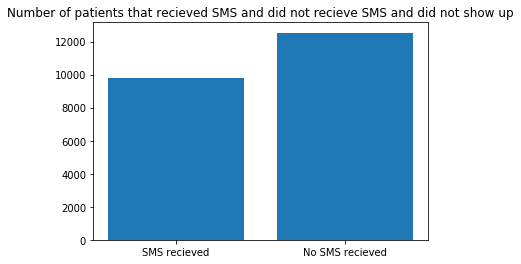

In [29]:
#A bar chart to compare between the no-show patients that recieved and did not recieve SMS message
plt.title('Number of patients that recieved SMS and did not recieve SMS and did not show up')
#plt.bar([1,2],[sms,no_sms],tick_label=['SMS recieved','No SMS recieved']);
chart_visual(sms,no_sms,'SMS recieved','No SMS recieved');

**It is found that the patients that do not recived SMS message tend to miss or not show up for the appointments.**

### Research Question 5  (What is the number of patients that need financial support and did not show up?)

To check for financial support, the patients who did not have a scholarship to the Brazilian welfare program and did not show up will be selected and compared with those who had scholarship and did not show up.

In [30]:
#No-show patients without a scholarship
no_scholarship=no_show_patients.query('Scholarship==False')
not_in_scholarship=no_scholarship['Scholarship'].value_counts().sum()
not_in_scholarship

19741

In [31]:
#No-show patients with a scholarship
scholarship=no_show_patients.query('Scholarship==True')
in_scholarship=scholarship['Scholarship'].value_counts().sum()
in_scholarship

2578

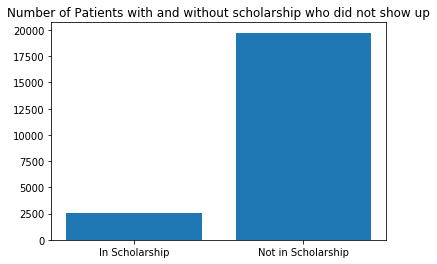

In [32]:
#A bar chart for easier comparison
plt.title('Number of Patients with and without scholarship who did not show up')
#plt.bar([1,2],[in_scholarship,not_in_scholarship],tick_label=['In Scholarship','Not in Scholarship'])
chart_visual(in_scholarship,not_in_scholarship,'In Scholarship','Not in Scholarship');

**Patients that do not have a scholarship/financial support do not show up for appointments more than the patients that have a scholarship.**

<a id='conclusions'></a>
## Conclusions

The results showed that the adults age group mostly do not show up for appointments compared with the other age groups. Yet, the most common neighbourhood that has highest number of patients that do not show up for the appointments are from Jardim Camburi. Moreover, a strong relationship is noticed between the patients that did not recieve SMS message and not showing up, compared to the patients that recieved SMS message. This has been proven evident by the bar chart that shows that most of the patients that miss the appointments usually do not recieve a SMS message. Finally, patients that are not included in the Brazlilian welfare scholarship program miss the appointments more than the patients that have a scholarship. However, the patients that are not handicapped do not show up for the appointments more than the handicapped patients.

However, having additional information such as the location or the distance between each neighbourhood and the hospital/clinic would have been useful to determine if location plays an important factor in patients not being able to show up to the appointments. For example, after finding out that the neighbourhood Jardim Camburi has the highest number of patients that miss the appointments, it would be useful to link it to how far it is from the hospital to reach to a solid conclusion.

### Limitations

The expolartion may be done from a single perspective, without taking into account other factors or features that may affect the patients going for an appointment. 


In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

# Additional resources used

**Add x and y labels to plot**
https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot/27520877


**Pie chart for question 2**
https://www.w3schools.com/python/matplotlib_pie_charts.asp

**Percentage on pie chart**
https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct